CLUSTERING

Clustering is the process of grouping a set of data objects into multiple groups or clusters so that objects within a cluster have high similarity, but are very dissimilar to objects in other clusters. Dissimilarities and similarities are assessed based on the feature values describing the objects and often involve distance measures.

Dataset Description

VIN (1-10): The first 10 characters of the Vehicle Identification Number (VIN), which uniquely identifies each vehicle.

County: The county where the vehicle is registered.

City: The city where the vehicle is registered.

State: The state where the vehicle is registered.

Postal Code: The postal code of the location where the vehicle is registered.

Model Year: The year when the vehicle model was manufactured.

Make: The manufacturer or brand of the vehicle.

Model: The specific model of the vehicle.

Electric Vehicle Type: The type of electric vehicle, such as Battery Electric Vehicle (BEV) or Plug-in Hybrid Electric Vehicle (PHEV).

Clean Alternative Fuel Vehicle (CAFV) Eligibility: Indicates whether the vehicle is eligible as a clean alternative fuel vehicle.

Electric Range: The range of the vehicle on electric power alone.

Base MSRP: The Manufacturer's Suggested Retail Price (MSRP) of the vehicle before any additional features or options.

Legislative District: The legislative district associated with the vehicle's registration.

DOL Vehicle ID: The unique identifier assigned by the Department of Licensing (DOL) for the vehicle.

Vehicle Location: The geographical location of the vehicle, possibly in latitude and longitude coordinates.

Electric Utility: The electric utility company associated with the vehicle.
2020 Census Tract: The Census Tract code associated with the vehicle's registration address, possibly from the 2020 Census.

Pre-processing data

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv('/content/Electric_Vehicle_Population_Data_short.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10


In [ ]:
df.shape

(999, 17)

In [ ]:
df = df.drop(columns=['Electric Vehicle Type','Clean Alternative Fuel Vehicle (CAFV) Eligibility',  'Electric Vehicle Type', 'Electric Utility','VIN (1-10)','State','2020 Census Tract'])
print(df)

        County          City  Postal Code  Model Year   Make     Model  \
0         King       Seattle      98126.0        2017   AUDI        A3   
1     Thurston       Olympia      98502.0        2018   AUDI        A3   
2     Thurston         Lacey      98516.0        2017  TESLA   MODEL S   
3     Thurston        Tenino      98589.0        2021   JEEP  WRANGLER   
4       Yakima        Yakima      98902.0        2020  TESLA   MODEL 3   
..         ...           ...          ...         ...    ...       ...   
994       King      Bellevue      98004.0        2023  TESLA   MODEL 3   
995       King       Bothell      98011.0        2023  TESLA   MODEL 3   
996       King      Kirkland      98034.0        2017    KIA   SOUL EV   
997  Snohomish  Lake Stevens      98258.0        2018  TESLA   MODEL 3   
998       King      Bellevue      98008.0        2018  TESLA   MODEL 3   

     Electric Range  Base MSRP  Legislative District  DOL Vehicle ID  \
0                16          0         

In [ ]:
columns_to_convert_2 = ['Postal Code','Electric Range', 'Legislative District', 'DOL Vehicle ID', 'Model Year', 'Base MSRP']

df[columns_to_convert_2] = df[columns_to_convert_2].astype(float)
print(df.dtypes)

County                   object
City                     object
Postal Code             float64
Model Year              float64
Make                     object
Model                    object
Electric Range          float64
Base MSRP               float64
Legislative District    float64
DOL Vehicle ID          float64
Vehicle Location         object
Cluster                   int32
dtype: object


In [ ]:
nan_cells = df.isna()

print(nan_cells)

# Drop all rows with any NaN values
df = df.dropna()
# Drop all columns with any NaN values
df = df.dropna(axis='columns')

     County   City  Postal Code  Model Year   Make  Model  Electric Range  \
0     False  False        False       False  False  False           False   
1     False  False        False       False  False  False           False   
2     False  False        False       False  False  False           False   
3     False  False        False       False  False  False           False   
4     False  False        False       False  False  False           False   
..      ...    ...          ...         ...    ...    ...             ...   
994   False  False        False       False  False  False           False   
995   False  False        False       False  False  False           False   
996   False  False        False       False  False  False           False   
997   False  False        False       False  False  False           False   
998   False  False        False       False  False  False           False   

     Base MSRP  Legislative District  DOL Vehicle ID  Vehicle Location  \
0

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the dataset
# Replace 'df' with the name of your DataFrame

# Select columns with 'object' dtype (non-numeric columns)
non_numeric_columns = df.select_dtypes(include=['object']).columns

# Check for non-numeric values in each non-numeric column
for column in non_numeric_columns:
    non_numeric_values = df[column].loc[df[column].apply(lambda x: not isinstance(x, (int, float)))]
    if not non_numeric_values.empty:
        print(f"Non-numeric values found in column '{column}':")
        print(non_numeric_values)
        print()


Non-numeric values found in column 'County':
0           King
1       Thurston
2       Thurston
3       Thurston
4         Yakima
         ...    
994         King
995         King
996         King
997    Snohomish
998         King
Name: County, Length: 998, dtype: object

Non-numeric values found in column 'City':
0           Seattle
1           Olympia
2             Lacey
3            Tenino
4            Yakima
           ...     
994        Bellevue
995         Bothell
996        Kirkland
997    Lake Stevens
998        Bellevue
Name: City, Length: 998, dtype: object

Non-numeric values found in column 'Make':
0       AUDI
1       AUDI
2      TESLA
3       JEEP
4      TESLA
       ...  
994    TESLA
995    TESLA
996      KIA
997    TESLA
998    TESLA
Name: Make, Length: 998, dtype: object

Non-numeric values found in column 'Model':
0            A3
1            A3
2       MODEL S
3      WRANGLER
4       MODEL 3
         ...   
994     MODEL 3
995     MODEL 3
996     SOUL EV
997     M

Kmeans

K-means Clustering: it is a centroid-based clustering algorithm that partitions data into k predefined clusters by minimizing the variance within each cluster, working best with spherical clusters of similar size.

1.Choose k: Select the number of clusters you want to form.
2.Initialize Centroids: Randomly pick k data points as the initial centroids.
3.Assign Clusters: Assign each data point to the nearest centroid based on the chosen distance metric (commonly Euclidean distance).
4.Update Centroids: Calculate the new centroids by finding the mean of all points assigned to each cluster.
5.Repeat: Continue alternating between assigning clusters and updating centroids until the centroids stabilize (no significant change), the assignments do not change, or a set number of iterations is reached.
6.Evaluate: Assess the quality of clustering, using metrics such as within-cluster sum of squares or silhouette score, and adjust k if necessary.

In [ ]:
features = df[['Postal Code','Electric Range', 'Legislative District', 'DOL Vehicle ID', 'Model Year', 'Base MSRP']]

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

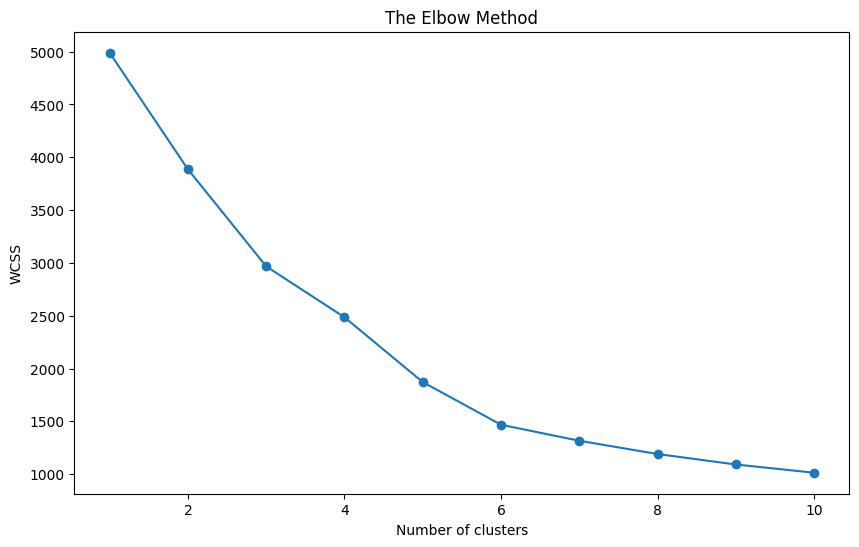

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
labels = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The silhouette score is a measure of how well-defined clusters are in a clustering algorithm. It ranges from -1 to 1, where a score closer to 1 indicates that the samples are far away from neighboring clusters, and thus the clustering configuration is appropriate. A score around 0 indicates overlapping clusters, and negative scores suggest that samples have been assigned to the wrong clusters.

In [ ]:
sil_score = silhouette_score(scaled_features, labels)
print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: 0.416


In [ ]:
df['Cluster'] = labels

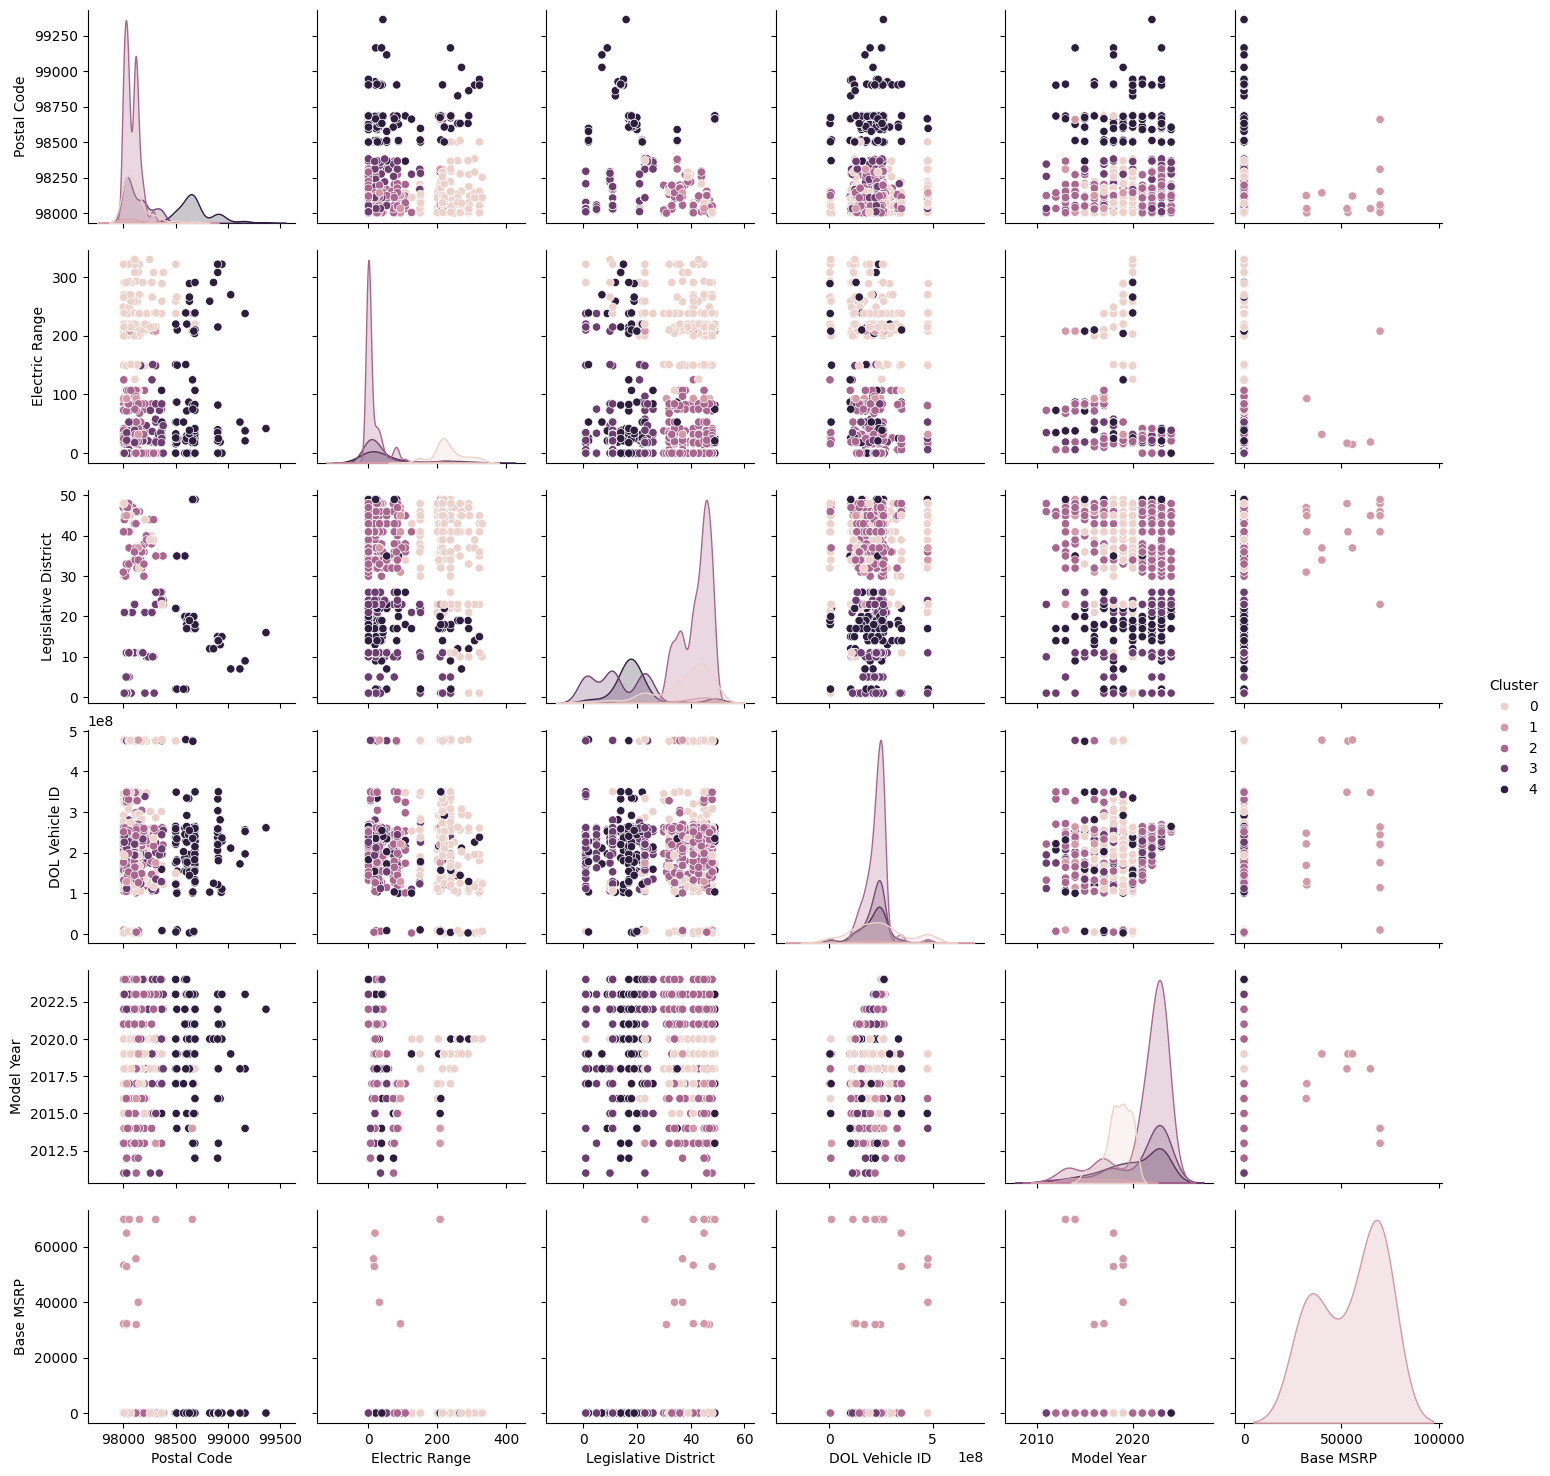

In [ ]:
import seaborn as sns
sns.pairplot(df, hue='Cluster', vars=['Postal Code','Electric Range', 'Legislative District', 'DOL Vehicle ID', 'Model Year', 'Base MSRP'])
plt.show()

A silhouette score of 0.416 suggests that the clusters are somewhat separated, but there is still room for improvement. tips for improvement-

1.Feature Selection and Engineering
2.Normalization
3.Hyperparameter Tuning
4.Algorithm Selection

Agglomerative

Agglomerative Clustering: it is a hierarchical clustering method that starts with each data point as its own cluster and merges the closest pairs iteratively, using various linkage criteria, to form a single cluster or until a desired number of clusters is achieved.

1.Initialize: Start with each data point as a single cluster.
2.Proximity Matrix: Calculate the distance between every pair of clusters.
3.Merge Clusters: Combine the two closest clusters into one.
4.Update Matrix: Recalculate distances between the new cluster and all others using a linkage criterion (e.g., single, complete, average, or centroid linkage).
5.Repeat: Continue merging and updating until all points are in a single cluster or desired cluster count is achieved.
6.Dendrogram: Construct a dendrogram to visualize the hierarchy and decide the number of clusters by "cutting" at the appropriate level.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import seaborn as sns

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

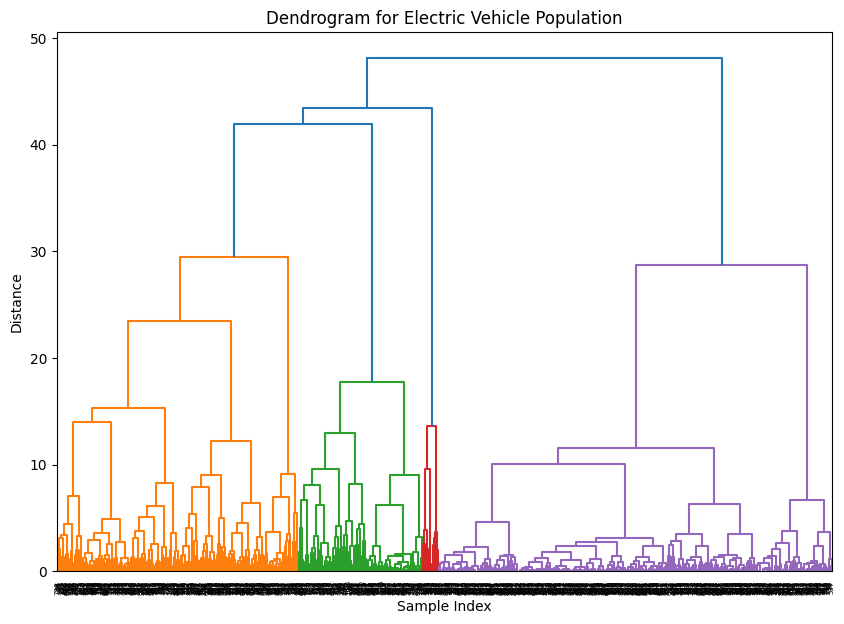

In [ ]:
linked = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Electric Vehicle Population')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
agg_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = agg_cluster.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
silhouette_avg = silhouette_score(scaled_features, labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.303


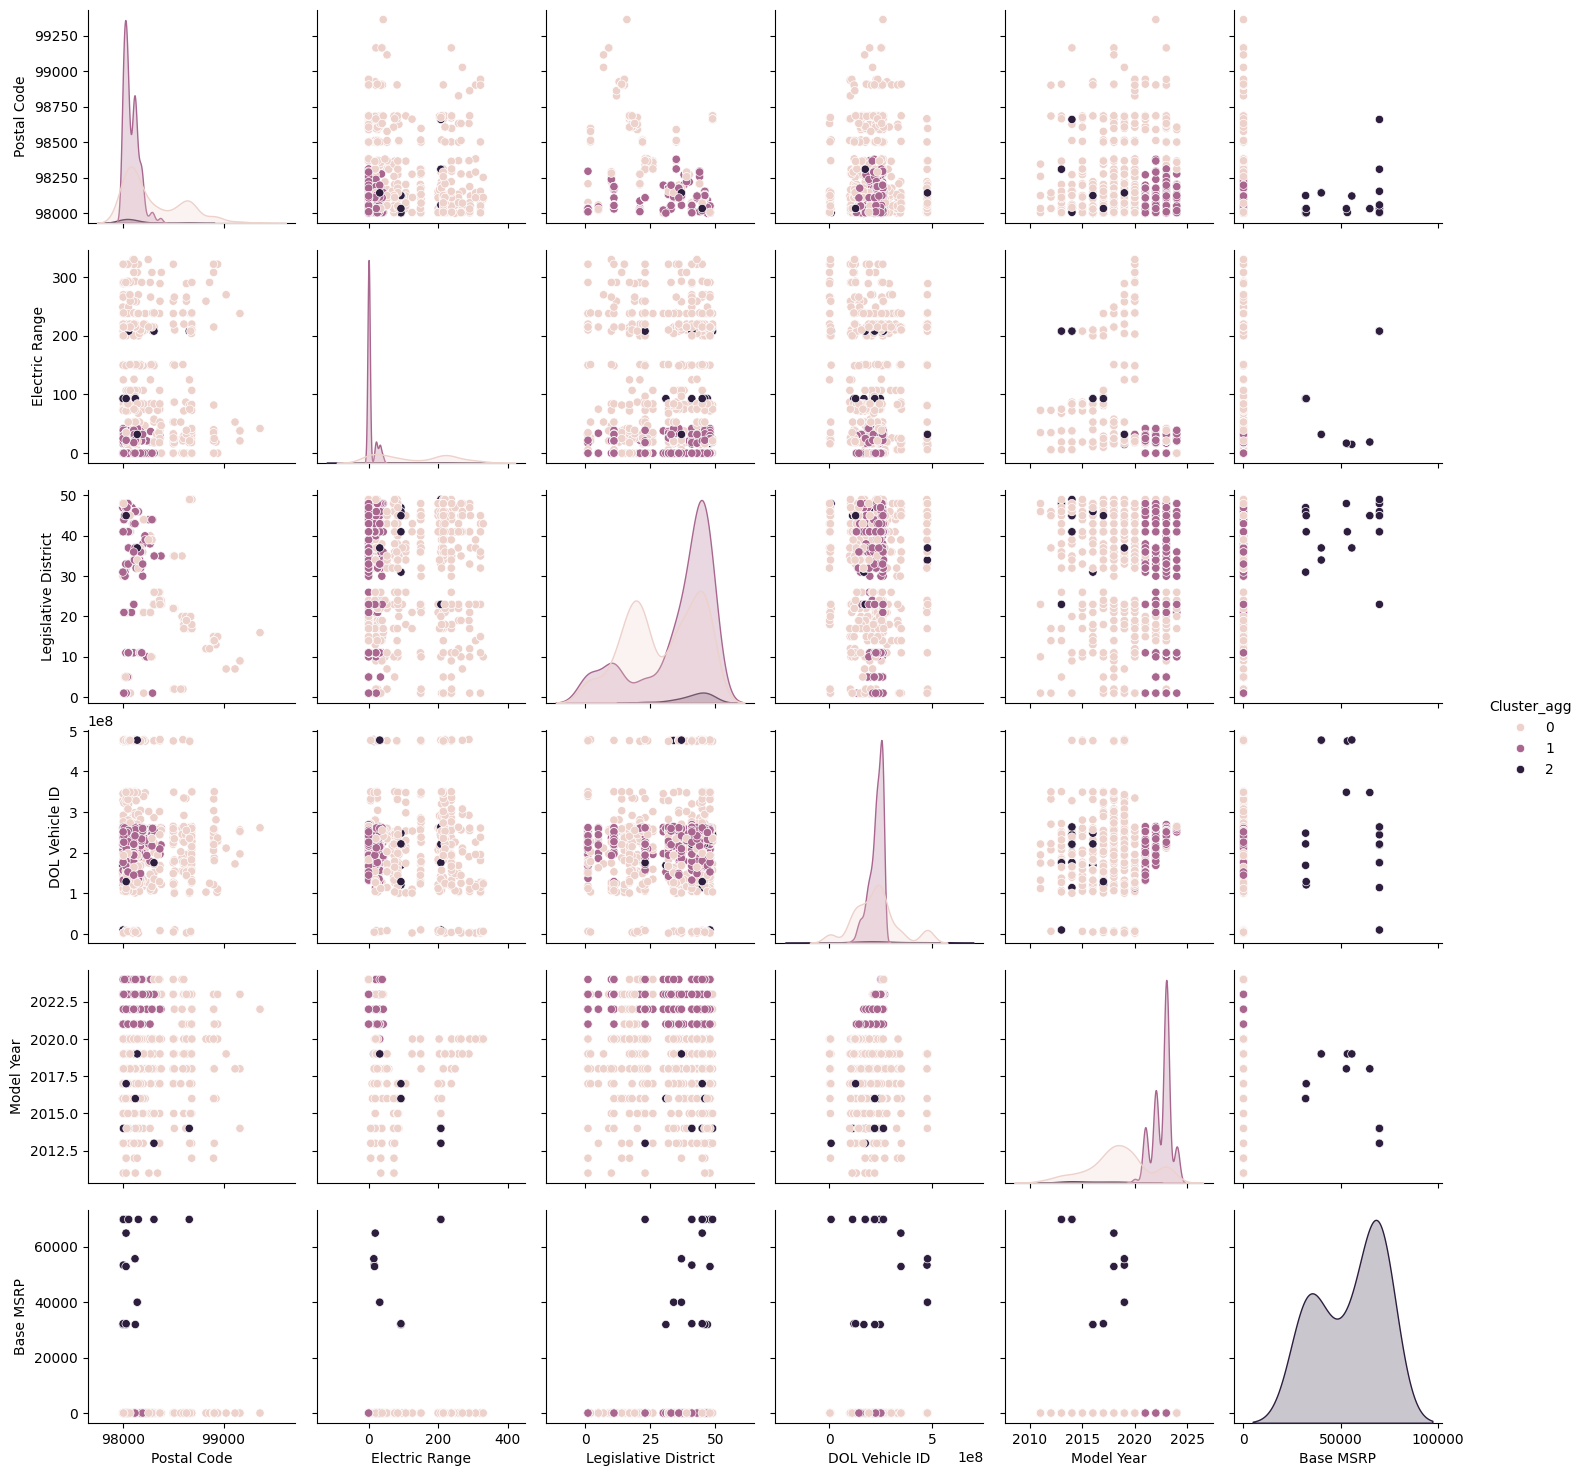

In [ ]:
sns.pairplot(df, hue='Cluster_agg', vars=['Postal Code','Electric Range', 'Legislative District', 'DOL Vehicle ID', 'Model Year', 'Base MSRP'])
plt.show()

A silhouette score of 0.303 indicates a very strong clustering structure in the data. It suggests that the clusters are well-separated from each other, and each data point is assigned to the correct cluster with high confidence. This indicates that the clustering algorithm has successfully identified distinct patterns or groups within the data.

Comparative analysis

1.Silhouette Score Interpretation:
K-means (0.416): The silhouette score suggests that the clusters produced by K-means are somewhat separated but not as well-defined as desired. There may be overlap between clusters or points that are incorrectly assigned.

Agglomerative (0.303): The significantly higher silhouette score indicates that the clusters formed by agglomerative clustering are well-separated and highly distinct. Each data point is assigned to the correct cluster with high confidence, indicating strong clustering structure.

2.Cluster Separation:
K-means: The clusters produced by K-means may exhibit some degree of overlap or ambiguity, leading to a lower silhouette score. The algorithm partitions the data into spherical clusters based on centroids, which may not be suitable for all types of data distributions.

Agglomerative: Agglomerative clustering, on the other hand, is a hierarchical clustering algorithm that merges data points based on their similarity. This approach often results in more cohesive and well-separated clusters, especially when the underlying data has clear hierarchical structure or spatial relationships.

3.Algorithm Performance:
K-means: K-means is sensitive to the initial placement of centroids and may converge to suboptimal solutions, especially in the presence of outliers or non-spherical clusters. The algorithm works well when clusters are well-separated and have similar sizes.

Agglomerative: Agglomerative clustering tends to perform well on datasets with non-spherical clusters and varying cluster sizes. It does not require the number of clusters to be specified in advance and can capture complex data structures effectively.

In conclusion, the comparative analysis suggests that agglomerative clustering outperforms K-means in terms of cluster separation and structure, as evidenced by the higher silhouette score. However, the choice between the two algorithms should consider various factors such as the dataset characteristics, computational resources, and specific goals of the analysis.